In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib as mpl 

# see https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/
# for more information on installing and configuring ffmpeg
mpl.rcParams['animation.ffmpeg_path'] = '/Users/rebecca/Applications/ffmpeg'

from util import rmse, rmse_by_month, plot_mean_errors, animate_predictions, animate_residuals

## Load the data and set up train and test sets

In [2]:
df = pd.read_csv("data/df_trains_ctx.csv")
df.head()

lon   lat  TOTEXTTAU  year  month  day        date           T  \
0 -176.5625  56.5   0.155240  1988      6    1  1988-06-01  224.617438   
1 -169.0625  56.5   0.152576  1988      6    1  1988-06-01  224.465418   
2 -161.5625  56.5   0.156077  1988      6    1  1988-06-01  224.373630   
3 -154.0625  56.5   0.154960  1988      6    1  1988-06-01  224.233717   
4 -146.5625  56.5   0.133917  1988      6    1  1988-06-01  223.987277   

     offset_1  aod_offset_1  ...   offset_27  aod_offset_27   offset_28  \
0  222.868979      0.163873  ...  225.573419       0.128559  226.981376   
1  222.561993      0.173268  ...  225.596504       0.114420  226.593252   
2  222.352100      0.166419  ...  225.560169       0.099483  225.985720   
3  222.211225      0.142224  ...  225.328833       0.092641  225.208402   
4  221.979365      0.137381  ...  224.791315       0.098885  224.288211   

   aod_offset_28   offset_29  aod_offset_29  Train_A  Test_A  Train_B  Test_B  
0       0.130827  229.257093       0.125594     True   False     True   False  
1       0.117272  229.008780       0.111849     True   False     True   False  
2       0.099029  228.609150       0.099602     True   False     True   False  
3       0.093702  227.929692       0.100677     True   False     True   False  
4       0.101869  226.916581       0.135423     True   False     True   False  

[5 rows x 70 columns]

In [3]:
X_offset_cols = [
    f"offset_{i}" for i in range(29,5, -1)
]

y_offset_cols = [
    f"offset_{i}" for i in range(5,0, -1)
] + ["T"]

aod_X_offset_cols = X_offset_cols + [
    f"aod_offset_{i}" for i in range(29, 5, -1)
]

X_Train_A = df[X_offset_cols][df.Train_A].values
X_Test_A = df[X_offset_cols][df.Test_A].values

X_Train_A_aod = df[aod_X_offset_cols][df.Train_A].values
X_Test_A_aod = df[aod_X_offset_cols][df.Test_A].values

y_Train_A = df[y_offset_cols][df.Train_A].values
y_Test_A = df[y_offset_cols][df.Test_A].values

X_Train_B = df[X_offset_cols][df.Train_B].values
X_Test_B = df[X_offset_cols][df.Test_B].values

X_Train_B_aod = df[aod_X_offset_cols][df.Train_B].values
X_Test_B_aod = df[aod_X_offset_cols][df.Test_B].values

y_Train_B = df[y_offset_cols][df.Train_B].values
y_Test_B = df[y_offset_cols][df.Test_B].values

# save the lat/lon/date values for test sets
# we will use this to plot predictions over time
# and on the map
test_A_labels = df[df.Test_A][["lon", "lat", "date"]]
test_B_labels = df[df.Test_B][["lon", "lat", "date"]]

## Fit a linear regression for each model

In [4]:
# training set A
lr_A = LinearRegression()
lr_A.fit(X_Train_A, y_Train_A)

y_pred_A = lr_A.predict(X_Test_A)

print(f"RMSE for training set A: {rmse(y_Test_A, y_pred_A, test_A_labels)}.\n")

# training set A with AOD
lr_A_aod = LinearRegression()
lr_A_aod.fit(X_Train_A_aod, y_Train_A)

y_pred_A_aod = lr_A_aod.predict(X_Test_A_aod)
print(f"RMSE for training set A with AOD: {rmse(y_Test_A, y_pred_A_aod, test_A_labels)}.\n")

# training set B
lr_B = LinearRegression()
lr_B.fit(X_Train_B, y_Train_B)

y_pred_B = lr_B.predict(X_Test_B)
print(f"RMSE for training set B: {rmse(y_Test_B, y_pred_B, test_B_labels)}.\n")

# training set B with AOD
lr_B_aod = LinearRegression()
lr_B_aod.fit(X_Train_B_aod, y_Train_B)

y_pred_B_aod = lr_A_aod.predict(X_Test_B_aod)

print(f"RMSE for training set B with AOD: {rmse(y_Test_B, y_pred_B_aod, test_B_labels)}.")

RMSE for training set A: 1.828596441872543.

RMSE for training set A with AOD: 1.901952700467822.

RMSE for training set B: 1.852899118291889.

RMSE for training set B with AOD: 1.927770919366276.


In [5]:
print(f"RMSE for training set A: {rmse(y_Test_A, y_pred_A, test_A_labels, weighted=False)}.\n")

RMSE for training set A: 1.9243081595450733.



In [6]:
# consider breakdowns by month
rmse_by_month(y_Test_A, y_pred_A, test_A_labels)

array([1.49635892, 1.74668827, 1.82478021, 1.88175414, 1.9582849 ,
       2.0637122 ])

In [7]:
rmse_by_month(y_Test_A, y_pred_A_aod, test_A_labels)

array([1.51539432, 1.81050593, 1.91880996, 1.97918472, 2.04397134,
       2.14384993])

In [8]:
rmse_by_month(y_Test_B, y_pred_B, test_B_labels)

array([1.45253755, 1.75957812, 1.89309095, 1.92126133, 1.97621231,
       2.11471446])

In [9]:
rmse_by_month(y_Test_B, y_pred_B_aod, test_B_labels)

array([1.46686146, 1.83307515, 2.00552256, 2.028885  , 2.04990629,
       2.18237506])

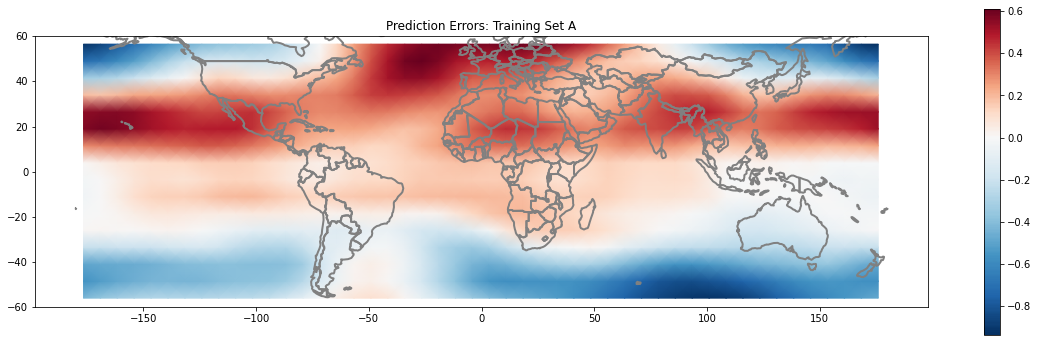

In [10]:
_ = plot_mean_errors(
    y_Test_A, 
    y_pred_A, 
    test_A_labels, 
    "Prediction Errors: Training Set A")

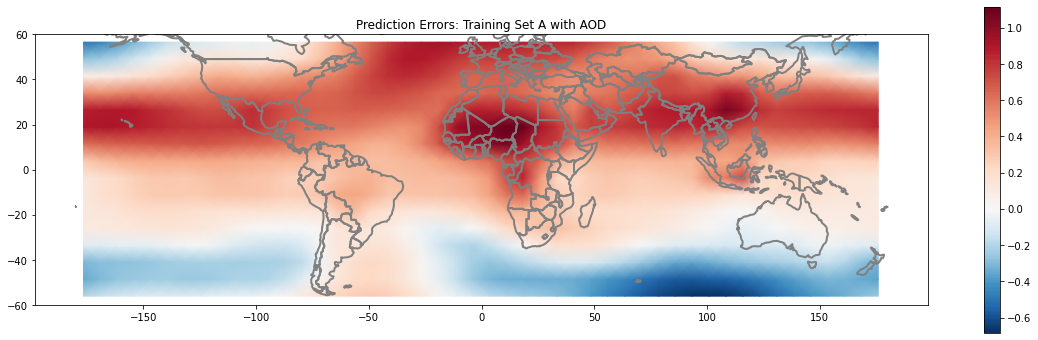

In [11]:
_ = plot_mean_errors(
    y_Test_A, 
    y_pred_A_aod, 
    test_A_labels, 
    "Prediction Errors: Training Set A with AOD")

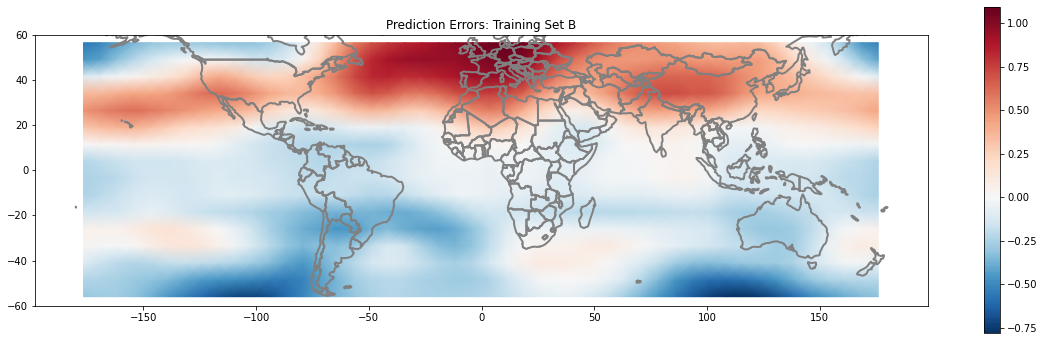

In [12]:
_ = plot_mean_errors(
    y_Test_B, 
    y_pred_B, 
    test_B_labels, 
    "Prediction Errors: Training Set B")

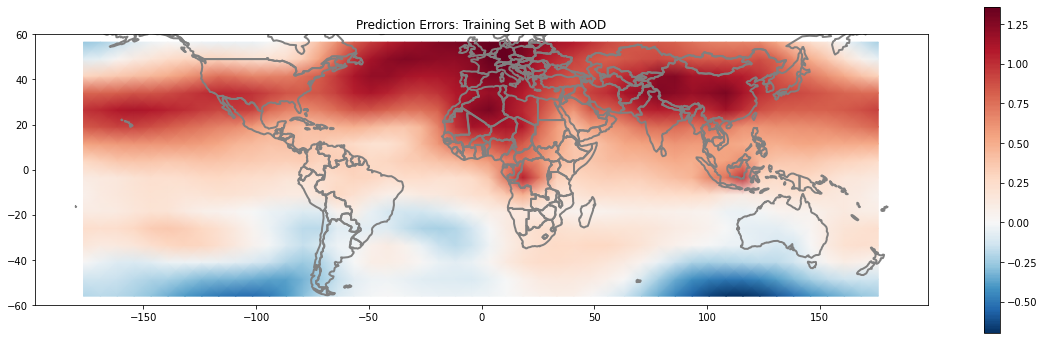

In [13]:
_ = plot_mean_errors(
    y_Test_B, 
    y_pred_B_aod, 
    test_B_labels, 
    "Prediction Errors: Training Set B with AOD")

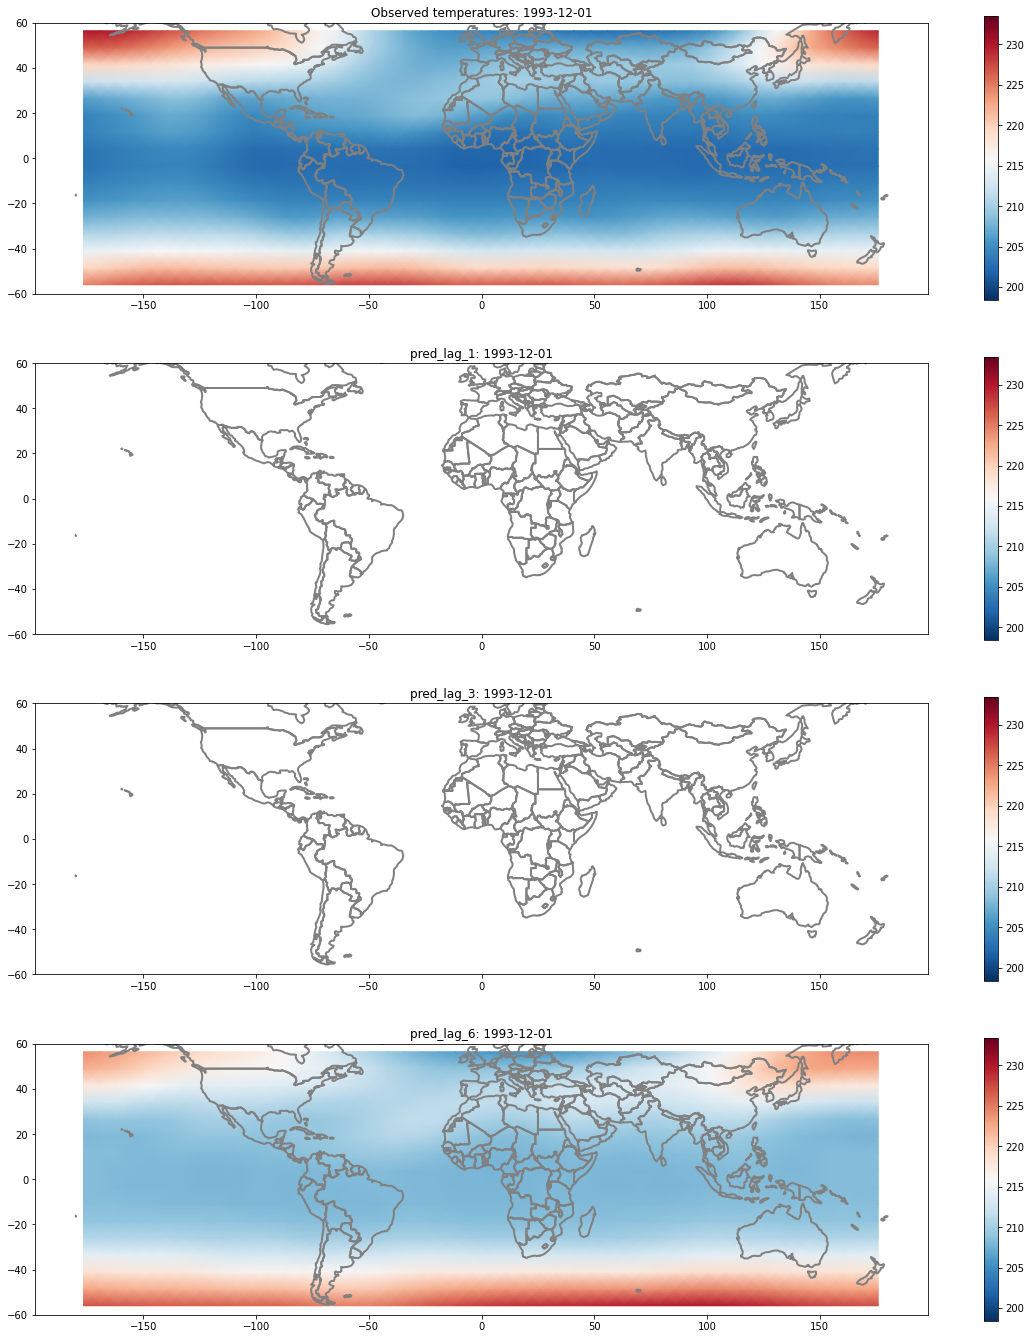

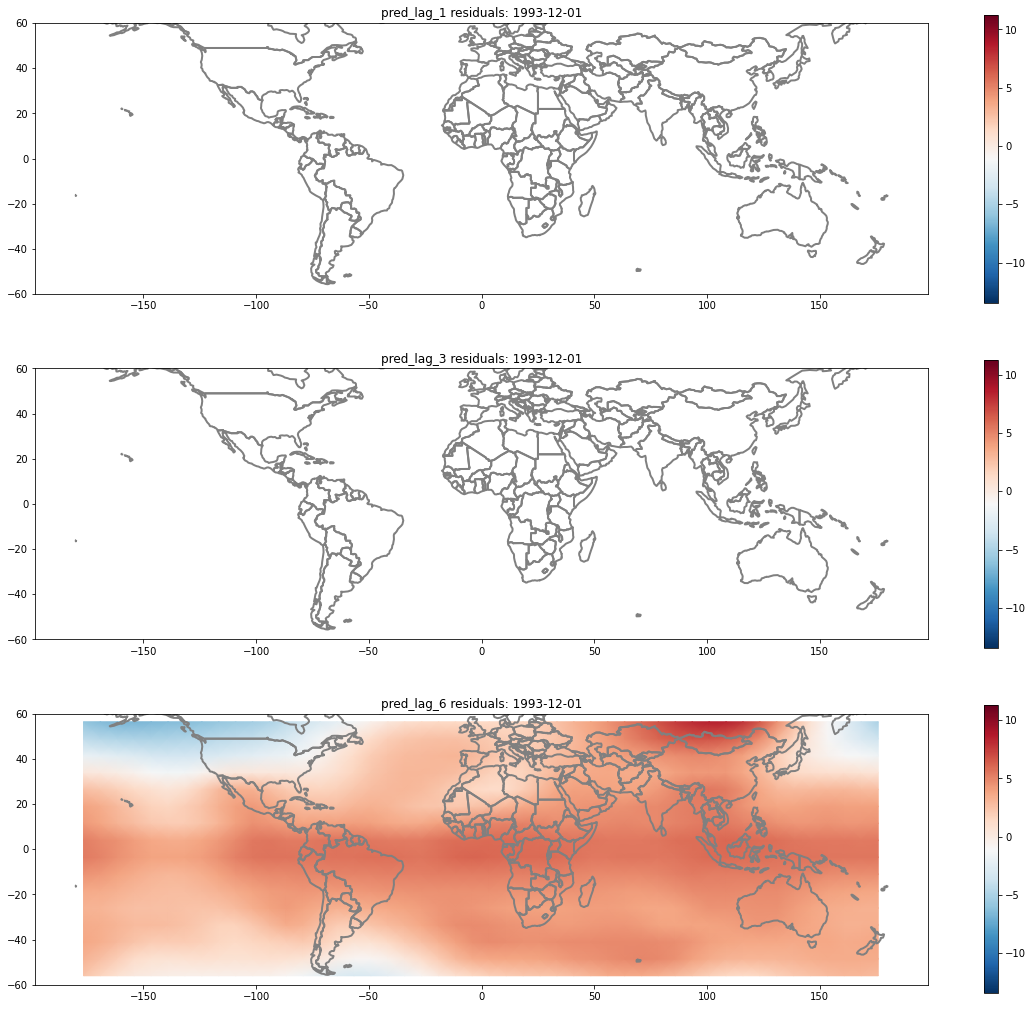

In [14]:
lags = [1,3,6]

animate_predictions(
    y_Test_A,
    y_pred_A,
    test_A_labels,
    "images/Test_A_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_A,
    y_pred_A,
    test_A_labels,
    "images/Test_A_residuals.mov",
    lags=lags
)

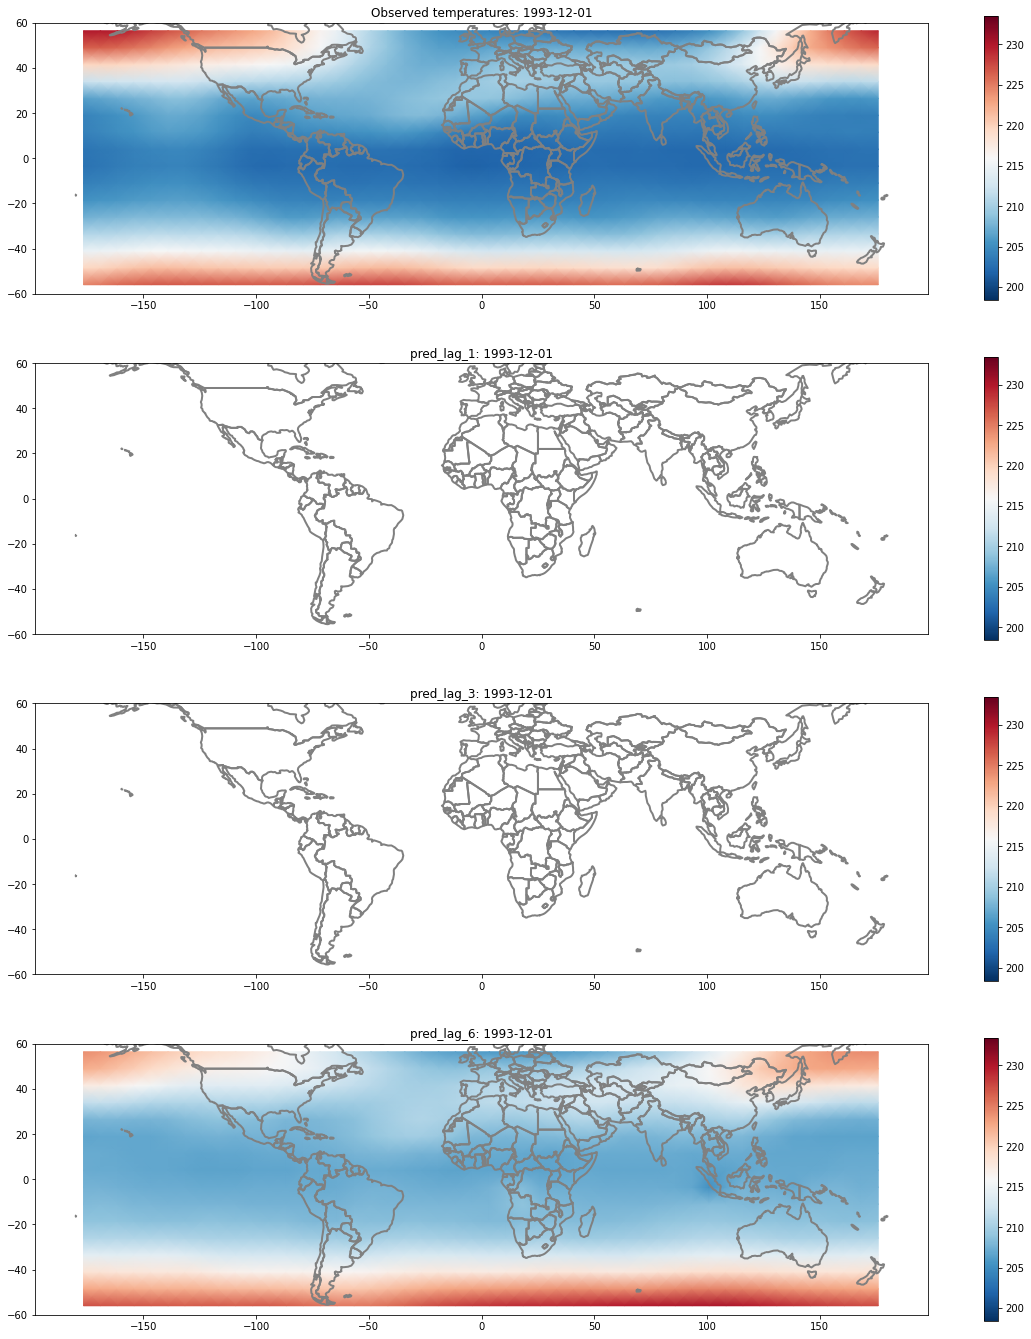

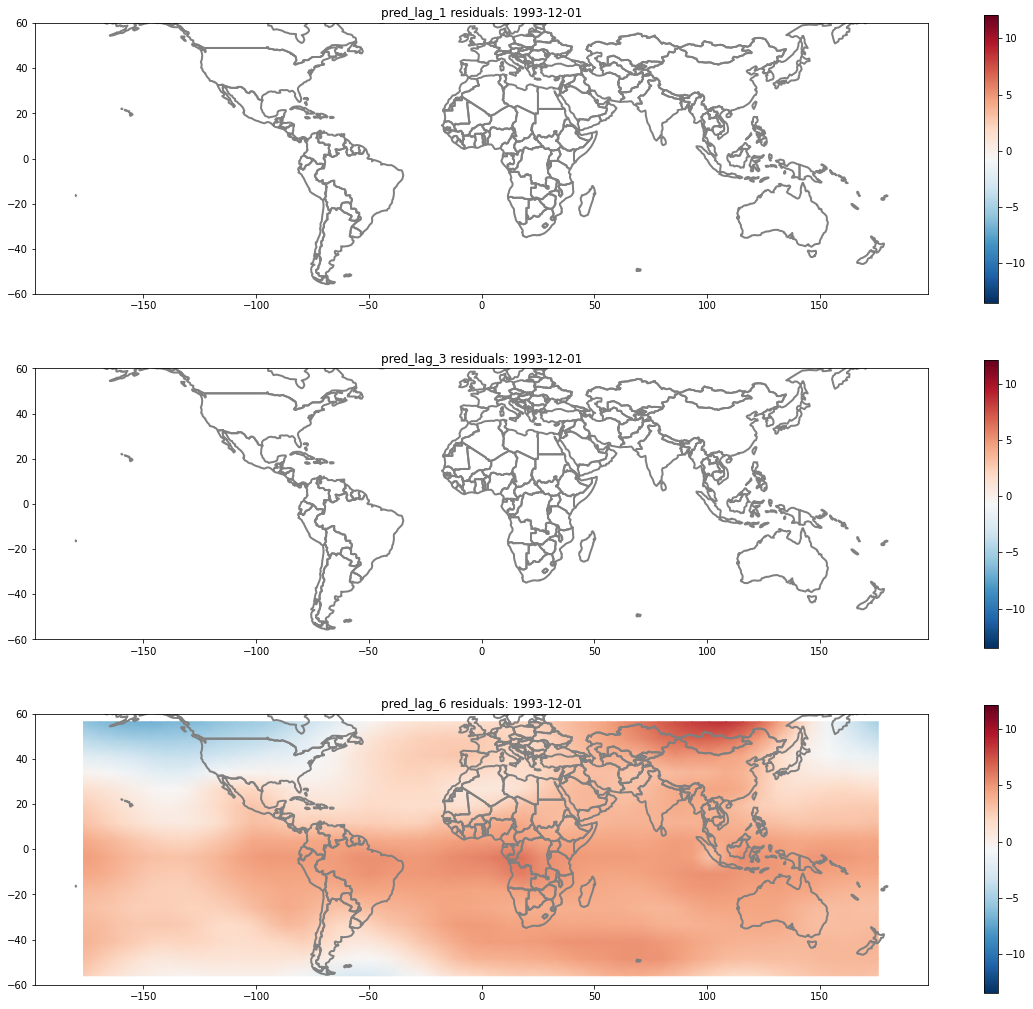

In [15]:
animate_predictions(
    y_Test_A,
    y_pred_A_aod,
    test_A_labels,
    "images/Test_A_aod_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_A,
    y_pred_A_aod,
    test_A_labels,
    "images/Test_A_aod_residuals.mov",
    lags=lags
)

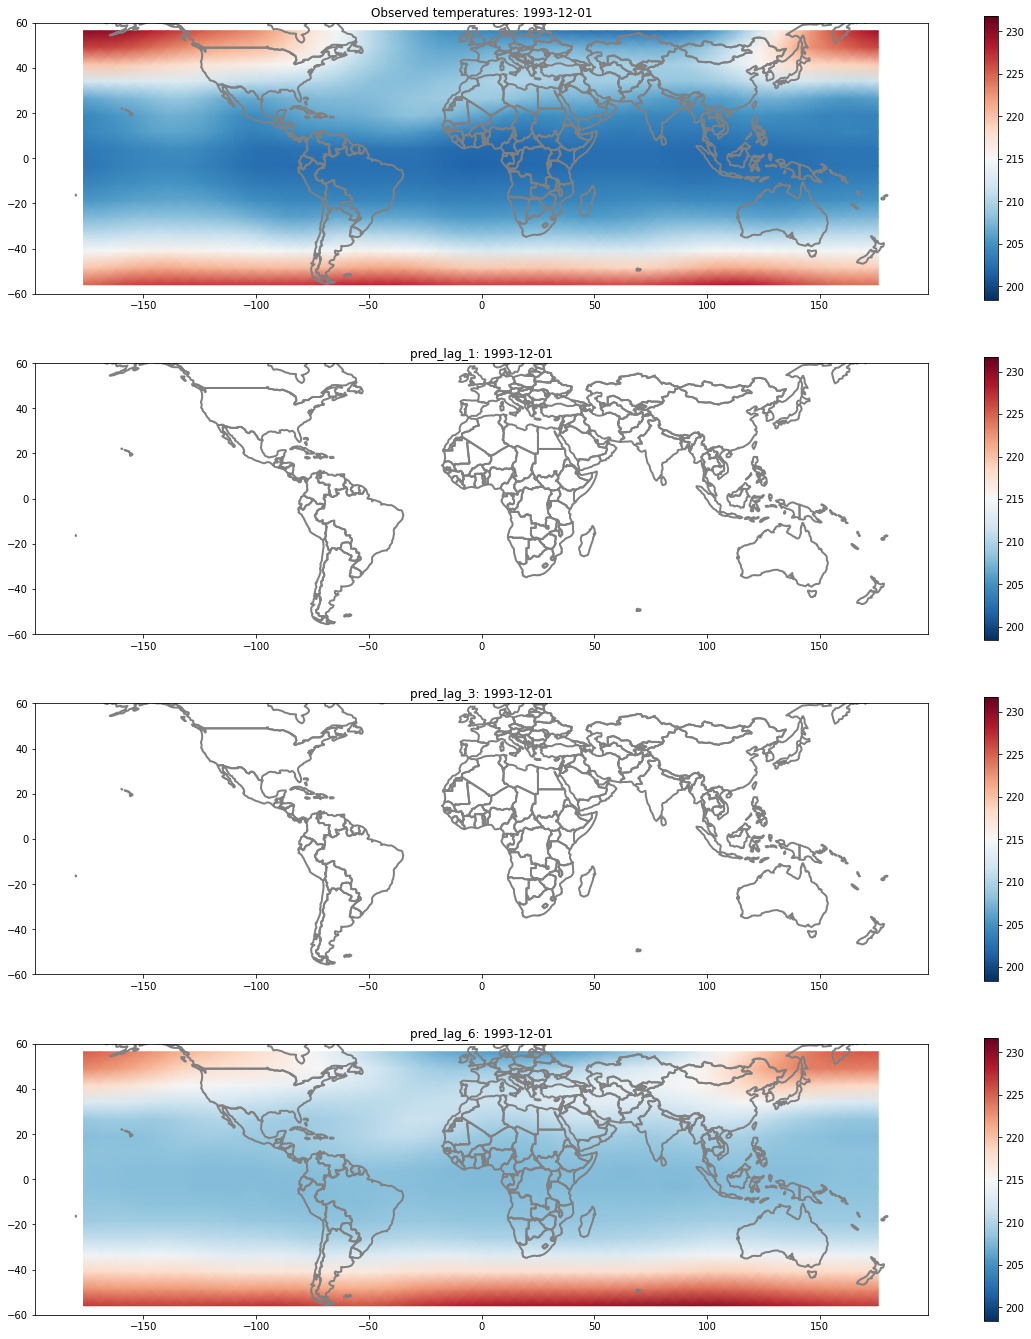

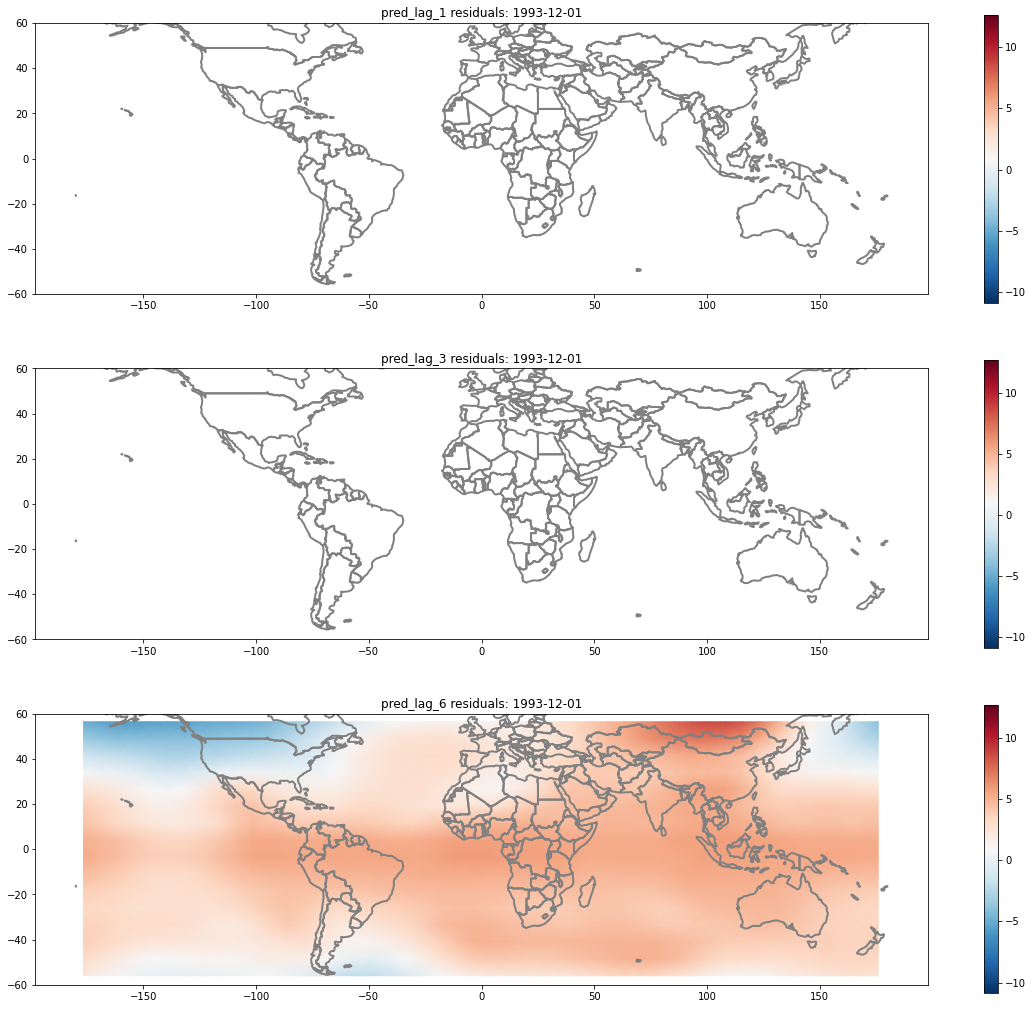

In [16]:
animate_predictions(
    y_Test_B,
    y_pred_B,
    test_B_labels,
    "images/Test_B_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_B,
    y_pred_B,
    test_B_labels,
    "images/Test_B_residuals.mov",
    lags=lags
)

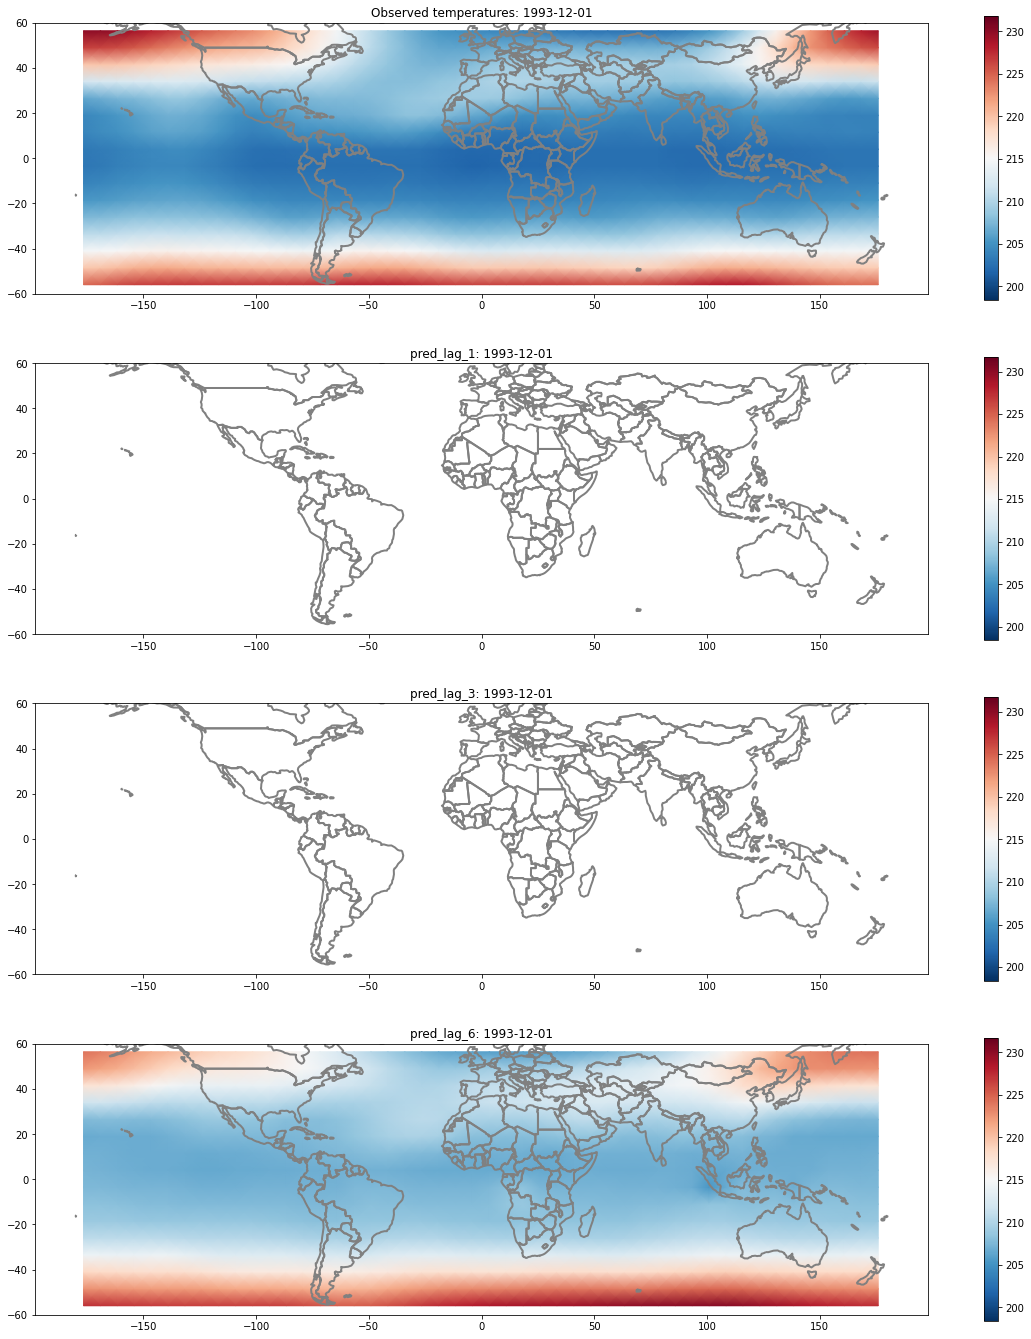

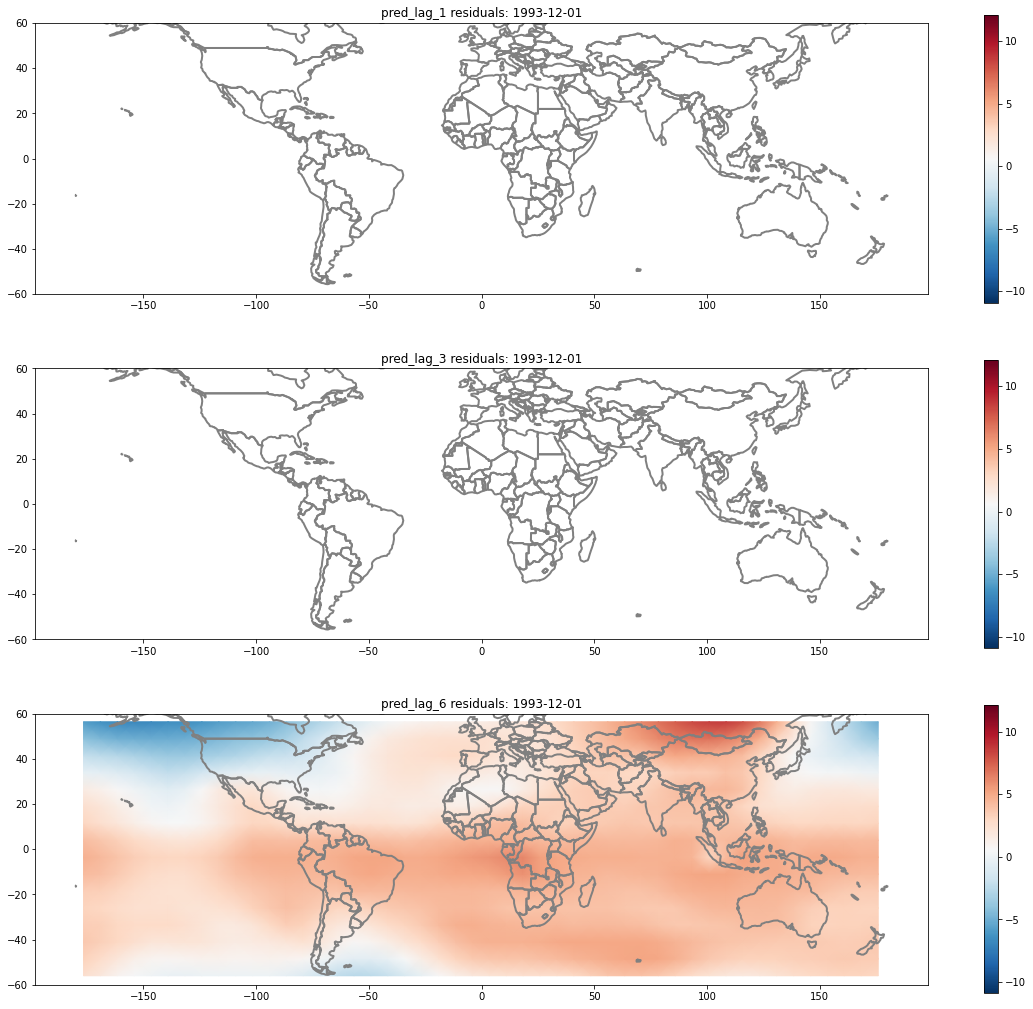

In [17]:
animate_predictions(
    y_Test_B,
    y_pred_B_aod,
    test_B_labels,
    "images/Test_B_aod_predictions.mov",
    lags=lags
)

animate_residuals(
    y_Test_B,
    y_pred_B_aod,
    test_B_labels,
    "images/Test_B_aod_residuals.mov",
    lags=lags
)

In [18]:
for lag in range(6):
    cc = np.corrcoef(
        (y_pred_A - y_Test_A)[:, lag],
        df[df.Test_A]["TOTEXTTAU"])[0,1]
    print(f"Lag: {lag + 1} month(s)\tCorrelation: {cc}")

Lag: 1 month(s)	Correlation: 0.02065401846777359
Lag: 2 month(s)	Correlation: 0.0016533755418297851
Lag: 3 month(s)	Correlation: -0.031983891795999274
Lag: 4 month(s)	Correlation: -0.08092663503704632
Lag: 5 month(s)	Correlation: -0.12290622509156805
Lag: 6 month(s)	Correlation: -0.1662459056687528


In [19]:
for lag in range(6):
    cc = np.corrcoef(
        (y_pred_B - y_Test_B)[:, lag],
        df[df.Test_B]["TOTEXTTAU"])[0,1]
    print(f"Lag: {lag + 1} month(s)\tCorrelation: {cc}")

Lag: 1 month(s)	Correlation: -0.03807832898677903
Lag: 2 month(s)	Correlation: -0.06309832901670996
Lag: 3 month(s)	Correlation: -0.0791785053933221
Lag: 4 month(s)	Correlation: -0.08967154487436144
Lag: 5 month(s)	Correlation: -0.104448853602269
Lag: 6 month(s)	Correlation: -0.14507568899592496


### Try normalizing temperature and AOD

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
# training set A
pipe_A = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_A.fit(X_Train_A, y_Train_A)

y_pred_A = pipe_A.predict(X_Test_A)

print(f"RMSE for training set A: {rmse(y_Test_A, y_pred_A, test_A_labels)}.\n")

# training set A with AOD
pipe_A_aod = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_A_aod.fit(X_Train_A_aod, y_Train_A)

y_pred_A_aod = pipe_A_aod.predict(X_Test_A_aod)
print(f"RMSE for training set A with AOD: {rmse(y_Test_A, y_pred_A_aod, test_A_labels)}.\n")

# training set B
pipe_B = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_B.fit(X_Train_B, y_Train_B)

y_pred_B = pipe_B.predict(X_Test_B)
print(f"RMSE for training set B: {rmse(y_Test_B, y_pred_B, test_B_labels)}.\n")

# training set B with AOD
pipe_B_aod = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_B_aod.fit(X_Train_B_aod, y_Train_B)

y_pred_B_aod = pipe_B_aod.predict(X_Test_B_aod)

print(f"RMSE for training set B with AOD: {rmse(y_Test_B, y_pred_B_aod, test_B_labels)}.")

RMSE for training set A: 1.8285964418725438.

RMSE for training set A with AOD: 1.9019527004678263.

RMSE for training set B: 1.8528991182918906.

RMSE for training set B with AOD: 1.9041393874001853.


Okay... normalizing inputs makes no difference.  What if we 
### normalize AOD by location?

In [22]:
train_A_means = df[df.Train_A].groupby(["lon", "lat"])["TOTEXTTAU"].mean()
train_A_stds = df[df.Train_A].groupby(["lon", "lat"])["TOTEXTTAU"].std()
train_B_means = df[df.Train_B].groupby(["lon", "lat"])["TOTEXTTAU"].mean()
train_B_stds = df[df.Train_B].groupby(["lon", "lat"])["TOTEXTTAU"].std()

In [23]:
df["train_A_mean_aod"] = df.apply(lambda row: train_A_means[row["lon"], row["lat"]],axis=1)
df["train_B_mean_aod"] = df.apply(lambda row: train_B_means[row["lon"], row["lat"]],axis=1)
df["train_A_std_aod"] = df.apply(lambda row: train_A_stds[row["lon"], row["lat"]],axis=1)
df["train_B_std_aod"] = df.apply(lambda row: train_B_stds[row["lon"], row["lat"]],axis=1)

In [24]:
offset_norm_A_cols = []
offset_norm_B_cols = []

for col in aod_X_offset_cols[24:]:
    df[col + "_norm_A"] = df.apply(lambda row: (row[col] - row["train_A_mean_aod"]) / row["train_A_std_aod"],axis=1)
    offset_norm_A_cols.append(col + "_norm_A")
    df[col + "_norm_B"] = df.apply(lambda row: (row[col] - row["train_A_mean_aod"]) / row["train_A_std_aod"],axis=1)
    offset_norm_B_cols.append(col + "_norm_B")

In [25]:
offset_norm_A_cols

['aod_offset_29_norm_A',
 'aod_offset_28_norm_A',
 'aod_offset_27_norm_A',
 'aod_offset_26_norm_A',
 'aod_offset_25_norm_A',
 'aod_offset_24_norm_A',
 'aod_offset_23_norm_A',
 'aod_offset_22_norm_A',
 'aod_offset_21_norm_A',
 'aod_offset_20_norm_A',
 'aod_offset_19_norm_A',
 'aod_offset_18_norm_A',
 'aod_offset_17_norm_A',
 'aod_offset_16_norm_A',
 'aod_offset_15_norm_A',
 'aod_offset_14_norm_A',
 'aod_offset_13_norm_A',
 'aod_offset_12_norm_A',
 'aod_offset_11_norm_A',
 'aod_offset_10_norm_A',
 'aod_offset_9_norm_A',
 'aod_offset_8_norm_A',
 'aod_offset_7_norm_A',
 'aod_offset_6_norm_A']

In [26]:
X_Train_A_aod_norm = df[X_offset_cols + offset_norm_A_cols][df.Train_A].values
X_Test_A_aod_norm = df[X_offset_cols + offset_norm_A_cols][df.Test_A].values

X_Train_B_aod_norm = df[X_offset_cols + offset_norm_B_cols][df.Train_B].values
X_Test_B_aod_norm = df[X_offset_cols + offset_norm_B_cols][df.Test_B].values

In [27]:
# training set A with AOD
lr_A_aod_norm = LinearRegression()
lr_A_aod_norm.fit(X_Train_A_aod_norm, y_Train_A)

y_pred_A_aod_norm = lr_A_aod_norm.predict(X_Test_A_aod_norm)
print(f"RMSE for training set A with AOD: {rmse(y_Test_A, y_pred_A_aod_norm, test_A_labels)}.\n")

# training set B with AOD
lr_B_aod_norm = LinearRegression()
lr_B_aod_norm.fit(X_Train_B_aod_norm, y_Train_B)

y_pred_B_aod_norm = lr_A_aod_norm.predict(X_Test_B_aod_norm)

print(f"RMSE for training set B with AOD: {rmse(y_Test_B, y_pred_B_aod_norm, test_B_labels)}.")

RMSE for training set A with AOD: 2.764124726102974.

RMSE for training set B with AOD: 3.078520562835349.


In [28]:
def inspect_coefs(model, feature_names):
    coefs = pd.DataFrame(model.coef_).T
    coefs.columns = [f"lag_{i}" for i in range(1,7)]
    coefs.index = feature_names
    return coefs

coefs = inspect_coefs(lr_A_aod_norm, X_offset_cols + offset_norm_A_cols)
coefs

lag_1     lag_2     lag_3     lag_4     lag_5  \
offset_29             0.194254  0.141894  0.092170 -0.022602  0.019080   
offset_28             0.200589  0.198062  0.127250  0.107092 -0.029306   
offset_27             0.015239  0.235372  0.188240  0.128142  0.111025   
offset_26            -0.087799 -0.009108  0.226691  0.182982  0.131494   
offset_25             0.014620 -0.086113 -0.008094  0.227462  0.174508   
offset_24             0.030207  0.019879 -0.071869 -0.000674  0.232780   
offset_23             0.006774  0.041883  0.017267 -0.062255  0.001418   
offset_22            -0.004483  0.005629  0.039331  0.009250 -0.057396   
offset_21            -0.052487 -0.038493  0.003678  0.029211 -0.001828   
offset_20            -0.024551 -0.065521 -0.048643 -0.008331  0.022598   
offset_19             0.024716 -0.018700 -0.067501 -0.028613  0.002050   
offset_18            -0.062523  0.008266 -0.029407 -0.070401 -0.045708   
offset_17             0.147183  0.033567  0.042946 -0.000847 -0.043945   
offset_16             0.116048  0.171502  0.051841  0.056343  0.005124   
offset_15             0.026188  0.150966  0.175995  0.035689  0.029814   
offset_14            -0.076092  0.008318  0.155219  0.171832  0.040981   
offset_13             0.053741 -0.068601  0.016349  0.154938  0.175807   
offset_12             0.041543  0.078863 -0.062320  0.035434  0.156372   
offset_11            -0.028000  0.018123  0.069237 -0.088255  0.033175   
offset_10            -0.029731 -0.033164  0.011796  0.073538 -0.086858   
offset_9              0.019729 -0.010703 -0.024837  0.011361  0.064010   
offset_8              0.018645  0.007875 -0.011441 -0.026515  0.021905   
offset_7             -0.067957 -0.009806 -0.012211 -0.007889 -0.024427   
offset_6              0.493783  0.180393  0.074175  0.035458  0.003364   
aod_offset_29_norm_A  0.000308 -0.096460 -0.051387  0.017044  0.052763   
aod_offset_28_norm_A -0.020631  0.022834 -0.075561 -0.058312  0.002748   
aod_offset_27_norm_A -0.028879 -0.045946  0.030794 -0.066371 -0.057693   
aod_offset_26_norm_A  0.044603 -0.001894 -0.051901  0.038799 -0.057239   
aod_offset_25_norm_A -0.040363  0.039692 -0.017261 -0.045459  0.051983   
aod_offset_24_norm_A -0.017766 -0.050150  0.036270 -0.031358 -0.026235   
aod_offset_23_norm_A  0.044749 -0.000436 -0.041987  0.037313 -0.044278   
aod_offset_22_norm_A  0.078075  0.091185  0.004224 -0.037974  0.053287   
aod_offset_21_norm_A -0.043867  0.072093  0.073589  0.004293 -0.036481   
aod_offset_20_norm_A -0.001024 -0.055126  0.066174  0.080057  0.011008   
aod_offset_19_norm_A  0.072392  0.052465 -0.032881  0.048496  0.066099   
aod_offset_18_norm_A  0.008257  0.083518  0.064832 -0.047833  0.039018   
aod_offset_17_norm_A  0.041868  0.057387  0.118878  0.067902 -0.058564   
aod_offset_16_norm_A  0.012752  0.061999  0.066848  0.135096  0.058349   
aod_offset_15_norm_A -0.010768 -0.010953  0.054125  0.066886  0.144537   
aod_offset_14_norm_A  0.049875  0.027021 -0.003062  0.054863  0.072278   
aod_offset_13_norm_A -0.015910  0.025606  0.020834  0.004898  0.063238   
aod_offset_12_norm_A  0.048322  0.024621  0.030389  0.024438  0.021375   
aod_offset_11_norm_A -0.012128  0.053383  0.017694  0.029906  0.019032   
aod_offset_10_norm_A  0.033630 -0.000084  0.073618  0.028498  0.028893   
aod_offset_9_norm_A  -0.038272 -0.010124 -0.020207  0.074164  0.041975   
aod_offset_8_norm_A   0.031811 -0.012779 -0.016715 -0.010366  0.081644   
aod_offset_7_norm_A   0.072655  0.030240 -0.016439  0.023474  0.035008   
aod_offset_6_norm_A  -0.012471  0.065201  0.044977  0.016074  0.034617   

                         lag_6  
offset_29            -0.020491  
offset_28             0.033444  
offset_27            -0.022313  
offset_26             0.103088  
offset_25             0.149564  
offset_24             0.135008  
offset_23             0.260939  
offset_22             0.009493  
offset_21            -0.067201  
offset_20             0.003176  
offset_19             0.027700  
of